In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
sales = pd.read_csv('supermarket_sales.csv')
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [30]:
#number of rows and columns in the dataset
sales.shape

(1000, 17)

In [31]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [32]:
#change date and time's datatype
sales['Date'] = sales['Date'].astype('datetime64')
sales['Time'] = sales['Time'].astype('datetime64')
# pd.to_datetime(sales['Time'])

In [33]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [34]:
#drop duplicates and missing values

#no duplicates in the dataset as shape remains the same
sales.drop_duplicates(inplace=True)
sales.shape

(1000, 17)

In [35]:
sales.dropna(inplace=True)

In [36]:
sales.shape

(1000, 17)

## Sales Performance & Trends:

### 1. Sales Peformance Analysis

In [37]:
#total sales revenue
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-07-05 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-07-05 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-07-05 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-07-05 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-07-05 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


#### The total revenue of sales is $322966.749

In [38]:
#Total Revenue
total_revenue = sales['Total'].sum()
total_revenue

322966.749

In [39]:
#Average Sales Revenue per invoice
avg_sales = sales.groupby('Invoice ID')['Total'].mean()
avg_sales.head()

Invoice ID
101-17-6199    336.5565
101-81-4070    131.9220
102-06-2002    132.5625
102-77-2261    480.0285
105-10-6182     45.1080
Name: Total, dtype: float64

### 2. Branch & City Analysis

In [40]:
#Branch with the highest total sales revenue
branch_sales = sales.groupby('Branch')['Total'].sum()
branch_sales = branch_sales.sort_values(ascending=False)
branch_sales

Branch
C    110568.7065
A    106200.3705
B    106197.6720
Name: Total, dtype: float64

#### The branch with the highest total sales revenue is C.

In [41]:
branch_sales.head(1)

Branch
C    110568.7065
Name: Total, dtype: float64

In [42]:
#sales performance by city
city_sales = sales.groupby('City')['Total'].sum()
city_sales

City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64

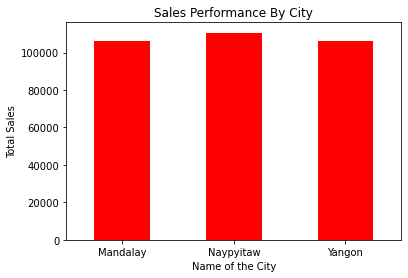

In [55]:
city_sales.plot(kind='bar', color='red')
plt.xlabel('Name of the City')
plt.ylabel('Total Sales')
plt.title('Sales Performance By City')
plt.xticks(rotation=360)
plt.show()

### 3. Product Line Analysis